In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf

In [20]:
data = pd.read_csv('data/barometer.csv', index_col='date', parse_dates=True)
data

,spy_o,spy_h,spy_l,spy_c,barometer_o,barometer_h,barometer_l,barometer_c,barometer,barometer_no_leakage_o,barometer_no_leakage_h,barometer_no_leakage_l,barometer_no_leakage_c,barometer_no_leakage
date,,,,,,,,,,,,,,
2011-01-04,127.330002,127.370003,126.190002,126.980003,0.736239,0.711271,0.731100,0.730708,0.727329,0.625000,0.250000,0.500000,0.375000,0.437500
2011-01-05,126.580002,127.720001,126.459999,127.639999,0.737672,0.728469,0.737919,0.733317,0.734344,0.562500,0.375000,0.531250,0.437500,0.476562
2011-01-06,127.690002,127.830002,127.010002,127.389999,0.746204,0.721079,0.747066,0.719802,0.733538,0.666667,0.312500,0.708333,0.270833,0.489583
2011-01-07,127.559998,127.769997,126.150002,127.139999,0.782605,0.733272,0.809746,0.786109,0.777933,0.656250,0.437500,0.828125,0.656250,0.644531
2011-01-10,126.580002,127.160004,126.199997,126.980003,0.688418,0.664312,0.713208,0.714059,0.694999,0.275000,0.237500,0.300000,0.325000,0.284375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,432.679993,442.000000,427.820007,441.950012,0.098217,0.074906,0.203892,0.178901,0.138979,0.098314,0.074969,0.203871,0.178889,0.139010
2022-01-31,441.239990,450.239990,439.820007,450.225006,0.126903,0.110288,0.286479,0.252284,0.193988,0.127018,0.110384,0.286473,0.252376,0.194063
2022-02-01,450.679993,453.630005,446.938385,453.500092,0.270826,0.228793,0.441531,0.420974,0.340531,0.270908,0.228935,0.441534,0.420962,0.340585


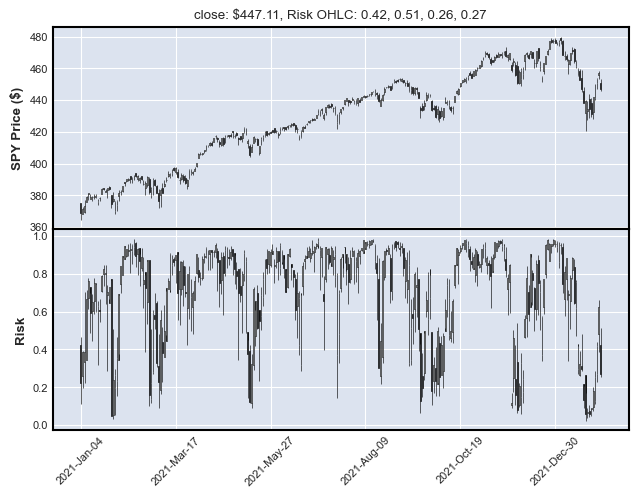

In [40]:
df = data.iloc[-252:].copy()

# signal = df.barometer.map(lambda x: x < 0.3)
# indx_list = signal[signal == True].index
# df_signal_up = pd.DataFrame()
# df_signal_up.index = signal.index
# df_signal_up['value'] = np.NaN
# for indx in indx_list:  
#     df_signal_up.loc[indx] = df.loc[indx]['spy_l'] * 0.995

# signal = df.barometer.map(lambda x: x > 0.87)
# indx_list = signal[signal == True].index
# df_signal_down = pd.DataFrame()
# df_signal_down.index = signal.index
# df_signal_down['value'] = np.NaN
# for indx in indx_list:  
#     df_signal_down.loc[indx] = df.loc[indx]['spy_h'] * 1.005

# apds = [
#     mpf.make_addplot(df_signal_up,type='scatter',markersize=15,color = 'green',alpha = 0.0, marker='^'),
#     mpf.make_addplot(df_signal_down,type='scatter',markersize=15,color = 'red',alpha = 0.0, marker='v'),    
#     mpf.make_addplot(df.barometer_no_leakage, type='line', alpha = 0.5, color = 'grey', ylabel = 'Risk'), 
#     mpf.make_addplot(df.barometer_no_leakage, type='scatter', alpha = 0.01, color = 'grey', ylabel = 'Risk'), 
    
#     ]

# mpf.plot(
#             df.rename(columns={"spy_o": "Open", "spy_h": "High", 
#                                        "spy_l": "Low", "spy_c": "Close"}),
#             type='candle', 
#             ylabel='SPY Price ($)',
#             addplot=apds,
#             figscale=1,
#             style = mpf.make_mpf_style(base_mpf_style='default', rc={'font.size':8}), 
#             axtitle='{} : {}'.format(str(df.index[0])[:10], str(df.index[-1])[:10]),
#          )  

df = data.copy()

i = '2021-01-01'
j = '2022-03-01'
df = data.loc[i:j].copy()
apds = [
    mpf.make_addplot(df.rename(columns={"barometer_no_leakage_o": "Open", "barometer_no_leakage_l": "High",
                                                        "barometer_no_leakage_h": "Low", "barometer_no_leakage_c": "Close"}),
                                                        type='candle', color = 'red', alpha = 0.3, width = 1.0, panel = 1, ylabel = 'Risk'),
]



mpf.plot(
            df.rename(columns={"spy_o": "Open", "spy_h": "High", 
                                "spy_l": "Low", "spy_c": "Close"}),
            type='candle', 
            ylabel='SPY Price ($)',
            addplot=apds,
            panel_ratios=(1,1),
            figscale=1,
            style = mpf.make_mpf_style(base_mpf_style='default', rc={'font.size':8}),    
            axtitle='close: ${:.02f}, Risk OHLC: {:.02f}, {:.02f}, {:.02f}, {:.02f}'.format( df.iloc[-1].spy_c, df.barometer_o.iloc[-1], df.barometer_l.iloc[-1], df.barometer_h.iloc[-1], df.barometer_c.iloc[-1]),
        )